## Observations and Insights 
- The data is statistically significant due to there only being one outlier in the data grids.
- The data points of weight and drug effectiveness are close together, meaning the r-correlation is strong.
- Ramicane and Capomulin are the most effection drugs.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.sample(10)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID') 

# Display the data table for preview
mouse_study.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1717,w575,Zoniferol,Female,16,28,35,63.686445,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1829,y478,Placebo,Female,3,25,25,57.826976,1
598,b487,Ceftamin,Female,6,28,15,51.683256,0
924,h246,Ketapril,Male,13,30,15,56.184327,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
580,a963,Stelasyn,Female,23,27,10,47.150522,0
1616,v339,Infubinol,Male,20,26,5,46.250112,0
1479,r850,Placebo,Male,5,30,15,50.218605,1
617,b759,Ceftamin,Female,12,25,30,55.742829,1


In [3]:
# Checking the number of mice.
len(mouse_study)

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study.drop(mouse_study[mouse_study['Mouse ID']== 'g989'].index, inplace=True)
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study)

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_mean = mouse_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
# print(tumor_volume_mean)

tumor_volume_median = mouse_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# print(tumor_volume_median)

tumor_volume_var = mouse_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# print(tumor_volume_var)

tumor_volume_std = mouse_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# print(tumor_volume_std)

tumor_volume_sem = mouse_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# print(tumor_volume_sem)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_volume_df = pd.DataFrame(tumor_volume_mean)
tumor_volume_df = tumor_volume_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Mean'})
tumor_volume_df

tumor_volume_df['Tumor Volume Median']=tumor_volume_median
tumor_volume_df['Tumor Volume Variance']=tumor_volume_var
tumor_volume_df['Tumor Volume St. Deviation']=tumor_volume_std
tumor_volume_df['Tumor Volume St. Error']=tumor_volume_sem
tumor_volume_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St. Deviation,Tumor Volume St. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

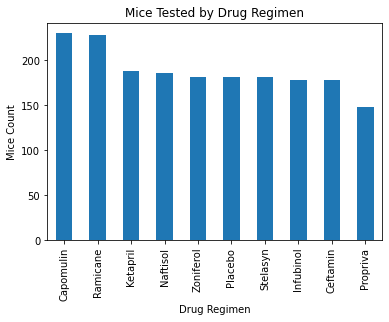

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_timepoints = mouse_study['Drug Regimen'].value_counts()
regimen_timepoints

mouse_study_bar = regimen_timepoints.plot.bar(title= 'Mice Tested by Drug Regimen')
mouse_study_bar.set_xlabel('Drug Regimen')
mouse_study_bar.set_ylabel('Mice Count')

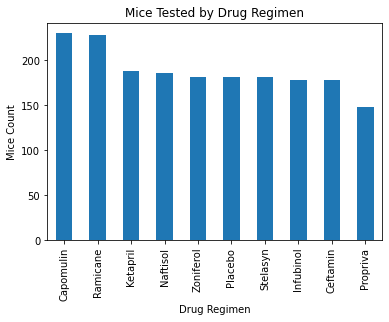

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_study_pyplot = pd.DataFrame(regimen_timepoints)
mouse_study_pyplot.plot.bar(legend=False)
plt.title('Mice Tested by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.show()

<AxesSubplot:title={'center':'Mice by Sex'}, ylabel='Mouse ID'>

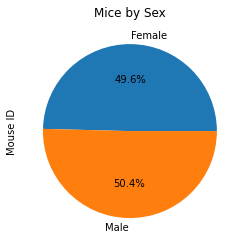

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_pie = mouse_study.groupby('Sex').nunique()['Mouse ID']
mouse_study_pie.plot.pie(autopct='%1.1f%%',title= 'Mice by Sex')

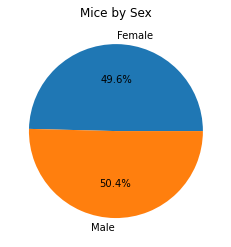

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_study_pie_pyplot = pd.DataFrame(mouse_study_pie)
plt.pie(mouse_study_pie, labels=mouse_study_pie.index, autopct='%1.1f%%')
plt.title('Mice by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_time = pd.DataFrame(mouse_study.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_mousedata = pd.merge(mouse_study, max_time, on='Mouse ID')
merged_mousedata.sample(10)

# Put treatments into a list for for loop (and later for plot labels)

drug_regimens =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for drug in drug_regimens:
    volume_df = merged_mousedata.loc[merged_mousedata['Drug Regimen']== drug]
    
    final_volume_df = volume_df.loc[volume_df['Timepoint'] ==volume_df['Max Timepoint']]
    values= final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq =quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f'IQR for {drug}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    outliers = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                          (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


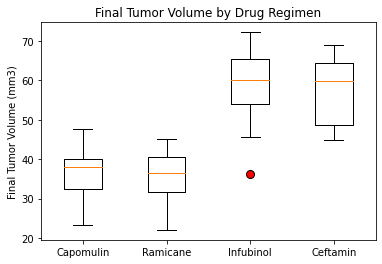

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

details = dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor= 'black')

plt.boxplot(drug_values, flierprops=details)
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

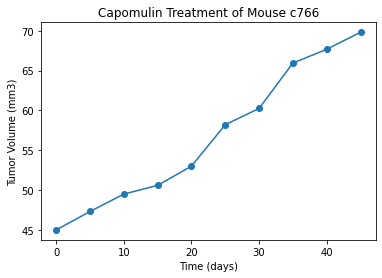

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = mouse_study.loc[mouse_study['Mouse ID'] == 'c766']

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel ("Time (days)")
plt.ylabel ("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse c766")
plt.show()

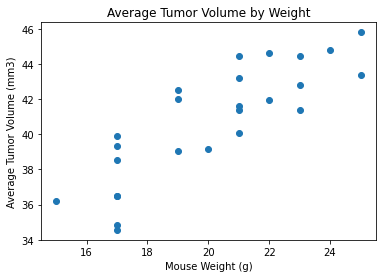

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data_sp = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']

avg_tumor_weight = pd.DataFrame(capomulin_data_sp.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_tumor_weight = pd.merge(capomulin_data_sp, avg_tumor_weight, on='Mouse ID')
final_tumor_weight = avg_tumor_weight [['Weight (g)','Average Tumor Volume']].drop_duplicates()
final_tumor_weight

x = final_tumor_weight['Weight (g)']
y = final_tumor_weight ['Average Tumor Volume']

plt.scatter(x,y)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation coefficient between weight and average tumor volume on the Capomulin regimen is 0.84.


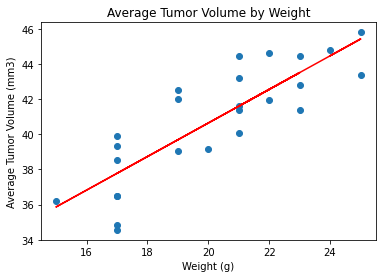

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

avg_tumor_weight = pd.DataFrame(capomulin_data_sp.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_tumor_weight = pd.merge(capomulin_data_sp, avg_tumor_weight, on='Mouse ID')
final_tumor_weight = avg_tumor_weight [['Weight (g)','Average Tumor Volume']].drop_duplicates()
final_tumor_weight

x = final_tumor_weight['Weight (g)']
y = final_tumor_weight ['Average Tumor Volume']

correlation = st.pearsonr(x,y)
print(f'The correlation coefficient between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.')

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x,y)
regress_values = x * slope + intercept 
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
line_eq

plt.scatter(x,y)
plt.plot(x, regress_values, 'r-')

plt.annotate(line_eq,(25,0), fontsize=20, color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()